# Excercise 3

# Handling Categorical Data in Python [Tutorial](https://www.datacamp.com/tutorial/categorical-data)

- read the flights dataset in a pandas DataFrame with read_csv()
- check the contents with the .head() method.

In [2]:
import pandas as pd

df_flight = pd.read_csv('flights.csv')
print(df_flight.head())

   year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2014      1    1       1.0       96.0     235.0       70.0      AS  N508AS   
1  2014      1    1       4.0       -6.0     738.0      -23.0      US  N195UW   
2  2014      1    1       8.0       13.0     548.0       -4.0      UA  N37422   
3  2014      1    1      28.0       -2.0     800.0      -23.0      US  N547UW   
4  2014      1    1      34.0       44.0     325.0       43.0      AS  N762AS   

   flight origin dest  air_time  distance  hour  minute  
0     145    PDX  ANC     194.0      1542   0.0     1.0  
1    1830    SEA  CLT     252.0      2279   0.0     4.0  
2    1609    PDX  IAH     201.0      1825   0.0     8.0  
3     466    PDX  CLT     251.0      2282   0.0    28.0  
4     121    SEA  ANC     201.0      1448   0.0    34.0  


- .info() method can be used on DataFrame.
- this gives us the information about the number of rows, columns, column data types, memory usage, etc

In [3]:
print(df_flight.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


- the columns with object dtype are the possible categorical features in your dataset.
- most common way to analyze the relationship between a categorical feature and a continuous feature is to plot a boxplot. 
- the boxplot is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. 
- the lower and upper quartiles are shown as horizontal lines at either side of the rectangle.
- .boxplot() method is used on the DataFrame to plot the boxplot

<AxesSubplot: title={'center': 'dep_time'}, xlabel='origin'>

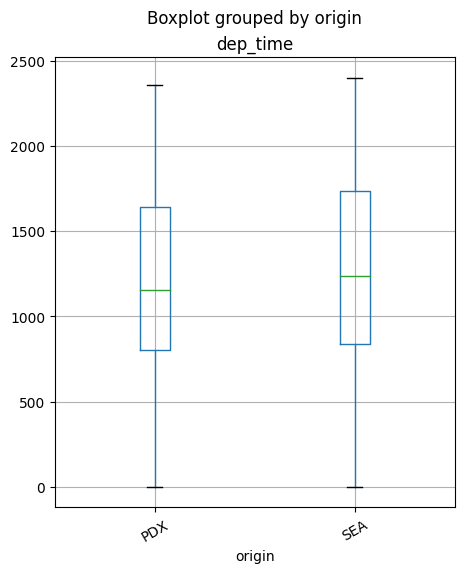

In [4]:
df_flight.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

- create DataFrame that only consists of object data types i.e. categorical features
- .copy() method is used so that any changes made in new DataFrame don't get reflected in the original one.

In [5]:
import copy

cat_df_flight = df_flight.select_dtypes(['object']).copy()
print(cat_df_flight)


       carrier tailnum origin dest
0           AS  N508AS    PDX  ANC
1           US  N195UW    SEA  CLT
2           UA  N37422    PDX  IAH
3           US  N547UW    PDX  CLT
4           AS  N762AS    SEA  ANC
...        ...     ...    ...  ...
162044      UA  N477UA    PDX  IAH
162045      DL  N137DL    SEA  ATL
162046      AS  N530AS    SEA  SAN
162047      US     NaN    PDX  PHX
162048      WN  N790SW    SEA  SMF

[162049 rows x 4 columns]


- the most common data pre-processing steps is to check for null values in the dataset.
- check the column-wise distribution of null values using isnull() and sum() method on the Categorical DataFrame
- the .isnull() method returns bool values
- using .sum() method over isnull() method counts the number of True value

In [6]:
print(cat_df_flight.isnull())
print(cat_df_flight.isnull().sum())


        carrier  tailnum  origin   dest
0         False    False   False  False
1         False    False   False  False
2         False    False   False  False
3         False    False   False  False
4         False    False   False  False
...         ...      ...     ...    ...
162044    False    False   False  False
162045    False    False   False  False
162046    False    False   False  False
162047    False     True   False  False
162048    False    False   False  False

[162049 rows x 4 columns]
carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


- It seems that only the tailnum column has null values. 
- We can perform mode imputation for those null values. 
- The function .fillna() method is handy for such operations.
- .value_counts() in the code below returns the frequency distribution of each category in the feature
- then selecting the top category, which is the mode, with the .index attribute.

In [10]:
print(cat_df_flight.fillna(cat_df_flight['tailnum'].value_counts().index[0]))

       carrier tailnum origin dest
0           AS  N508AS    PDX  ANC
1           US  N195UW    SEA  CLT
2           UA  N37422    PDX  IAH
3           US  N547UW    PDX  CLT
4           AS  N762AS    SEA  ANC
...        ...     ...    ...  ...
162044      UA  N477UA    PDX  IAH
162045      DL  N137DL    SEA  ATL
162046      AS  N530AS    SEA  SAN
162047      US  N223AG    PDX  PHX
162048      WN  N790SW    SEA  SMF

[162049 rows x 4 columns]
